> # FINAL PROJECT DATA SCIENCE - TRAVEL

<img src="https://wallpapers.com/images/featured/sfondo-aereo-4k-nyp57gekd7c1l5ri.jpg"/>

## ✨ **SUMMARY** ✨

---

### 🔍 **EXPLORATORY DATA ANALYSIS**
   - 🗂️ Dataset exploration
   - ❓ Missing values
   - 🔄 Encoding of categorical variables
   - ⚖️ Checking for imbalance
   - ⚠️ Outliers
   - 📊 Correlation matrix
   - 🎯 Features selection

---

### 📈 **EVALUATION METRICS FOR CLASSIFICATION MODELS**

---

### 🤖 **MODEL**
   - 🛤️ Way one
   - 🛤️ Way two

---

## 📝 **CONCLUSIONS** 

---

# 🔍 1. EXPLORATORY DATA ANALYSIS

In [482]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import  chi2, mutual_info_classif
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [484]:
# import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# create a copy
aereo_train = train.copy()
aereo_test = test.copy()

## 🗂️ 1.1 Dataset exploration

There is the following information about the passengers of some airline:

- **Gender**: male or female
- **Customer type**: regular or non-regular airline customer
- **Age**: the actual age of the passenger
- **Type of travel**: the purpose of the passenger's flight (personal or business travel)
- **Class**: business, economy, economy plus
- **Flight distance**
- **Inflight wifi service**: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
- **Departure/Arrival time convenient**: departure/arrival time satisfaction level (0: not rated; 1-5)
- **Ease of Online booking**: online booking satisfaction rate (0: not rated; 1-5)
- **Gate location**: level of satisfaction with the gate location (0: not rated; 1-5)
- **Food and drink**: food and drink satisfaction level (0: not rated; 1-5)
- **Online boarding**: satisfaction level with online boarding (0: not rated; 1-5)
- **Seat comfort**: seat satisfaction level (0: not rated; 1-5)
- **Inflight entertainment**: satisfaction with inflight entertainment (0: not rated; 1-5)
- **On-board service**: level of satisfaction with on-board service (0: not rated; 1-5)
- **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
- **Baggage handling**: level of satisfaction with baggage handling (0: not rated; 1-5)
- **Checkin service**: level of satisfaction with checkin service (0: not rated; 1-5)
- **Inflight service**: level of satisfaction with inflight service (0: not rated; 1-5)
- **Cleanliness**: level of satisfaction with cleanliness (0: not rated; 1-5)
- **Departure delay in minutes**
- **Arrival delay in minutes**

This data set contains a survey on air passenger satisfaction. The following classification problem is set:

It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

- **Satisfaction**: Neutral or dissatisfied

In [488]:
# checking what the dataset looks like
aereo_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [490]:
# Check columns and rows
print(f"Shape of the dataset: {aereo_train.shape[0]} rows and {aereo_train.shape[1]} columns. ")
print("\nColumns in this dataset:\n", aereo_train.columns)

Shape of the dataset: 103904 rows and 25 columns. 

Columns in this dataset:
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [492]:
# Drop unnecessary columns
aereo_train = aereo_train.drop('Unnamed: 0', axis=1)
aereo_train = aereo_train.drop('id', axis=1)

# Check size of the dataset
aereo_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Repeating the same steps for test data set:

In [495]:
aereo_test.head

<bound method NDFrame.head of        Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wi

In [497]:
print(f"Shape of the dataset: {aereo_test.shape[0]} rows and {aereo_test.shape[1]} columns. ")
print("\nColumns in this dataset:\n", aereo_test.columns)

Shape of the dataset: 25976 rows and 25 columns. 

Columns in this dataset:
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [499]:
# drop unnecessary columns
aereo_test = aereo_test.drop('Unnamed: 0', axis=1)
aereo_test = aereo_test.drop('id', axis=1)

aereo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

## ❓ 1.2 Missing values

Check for missing values: I created a table which contains the value types, the unique values and the missing values of each column:

In [503]:

aereo_train_info= pd.DataFrame({"Dtype": aereo_train.dtypes, 
                            "Unique values": aereo_train.nunique(),
                            "Missing values(%)": round(aereo_train.isnull().sum()/aereo_train.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

aereo_train_info

,Dtype,Unique values,Missing values(%)
Columns,,,
Gender,object,2,0.0
Customer Type,object,2,0.0
Age,int64,75,0.0
Type of Travel,object,2,0.0
Class,object,3,0.0
Flight Distance,int64,3802,0.0
Inflight wifi service,int64,6,0.0
Departure/Arrival time convenient,int64,6,0.0
Ease of Online booking,int64,6,0.0


In [505]:
aereo_test_info= pd.DataFrame({"Dtype": aereo_test.dtypes, 
                            "Unique values": aereo_test.nunique(),
                            "Missing values(%)": round(aereo_test.isnull().sum()/aereo_test.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

aereo_test_info

,Dtype,Unique values,Missing values(%)
Columns,,,
Gender,object,2,0.00
Customer Type,object,2,0.00
Age,int64,75,0.00
Type of Travel,object,2,0.00
Class,object,3,0.00
Flight Distance,int64,3281,0.00
Inflight wifi service,int64,6,0.00
Departure/Arrival time convenient,int64,6,0.00
Ease of Online booking,int64,6,0.00


The column 'Arrival Delay in Minutes' contains a percentage of 3%  of missing values.
I want to calculate the percentage of missing data in case I decide to delete or replace it.

In [508]:
# Create a copy of the dataframe to test the drop of rows with missing values
test_drop = aereo_train.dropna()

# Calculate the percentage of deleted data 
rows_removal_perc = round((1-test_drop.shape[0]/aereo_train.shape[0])*100,2)

print(f"\nRows in the original dataframe_train: {aereo_train.shape[0]}.") 

print(f"\nDataframe rows after removing missing values: {test_drop.shape[0]}")

print(f'\nRemoving lines that contain NaN values has eliminated {rows_removal_perc}% of the data!')



Rows in the original dataframe_train: 103904.

Dataframe rows after removing missing values: 103594

Removing lines that contain NaN values has eliminated 0.3% of the data!


In [509]:
# Create a copy of the dataframe to test the drop of rows with missing values
test_drop2 = aereo_test.dropna()

# Calculate the percentage of deleted data 
rows_removal_perc = round((1-test_drop2.shape[0]/aereo_test.shape[0])*100,2)

print(f"\nRows in the original dataframe_test: {aereo_test.shape[0]}.") 

print(f"\nDataframe rows after removing missing values: {test_drop2.shape[0]}")

print(f'\nRemoving lines that contain NaN values has eliminated {rows_removal_perc}% of the data!')


Rows in the original dataframe_test: 25976.

Dataframe rows after removing missing values: 25893

Removing lines that contain NaN values has eliminated 0.32% of the data!


In my opinion, in this case data loss is tolerable. However I replace the missing values ​​with zero.

In [513]:
# Imputing missing value with mean
aereo_train.fillna({'Arrival Delay in Minutes':0}, inplace=True)

aereo_test.fillna({'Arrival Delay in Minutes':0}, inplace=True)

In [515]:
# I check the dataset
aereo_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [517]:
aereo_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## 🔄 1.3 Encoding of categorical variables

### 1.3.1 Categorigal Features

See quick info of category values.

In [522]:
aereo_train.describe(include = object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


I created a function to visualized categorical columns

In [535]:
def count_plot(column_name):
    graph = sns.countplot(x = column_name, data = aereo_train, order = aereo_train[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    
    plt.show()

- Discovering **Gender** column:

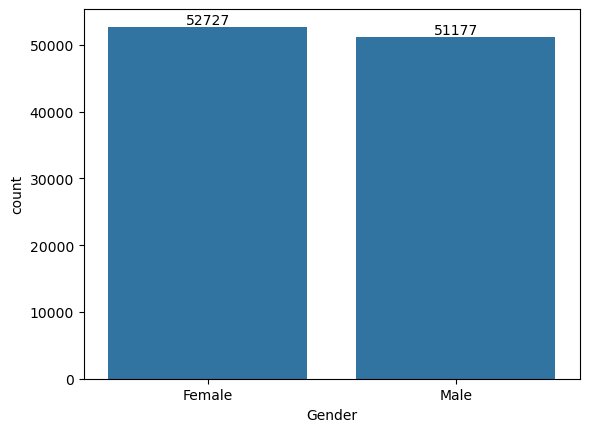

In [538]:
count_plot("Gender")

*Gender seemed to be equal in data.*

- Discovering **Age** column:

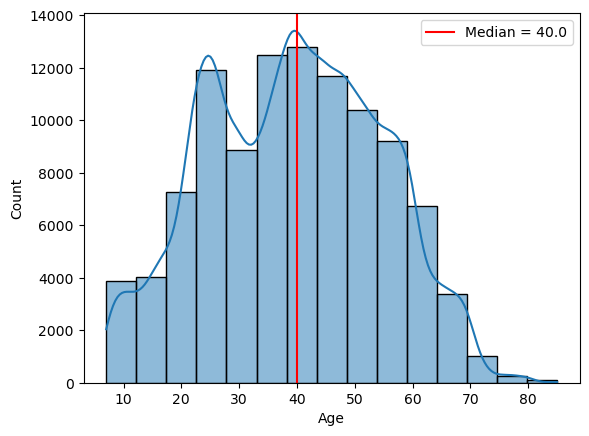

In [542]:
# see distribution 

sns.histplot(x = "Age", data = aereo_train, kde = True, bins = 15)
plt.axvline(aereo_train.Age.median(), label = f'Median = {aereo_train.Age.median()}', color = 'r')
plt.legend()
plt.show()

*The most of the airline's regular customers are between the ages of 25 and 50 (their average age is 40). The age range of non-regular customers is slightly smaller (from 20 to 40 years old, on average - a little less than 30).*

- Discovering **Costumer Type** column:

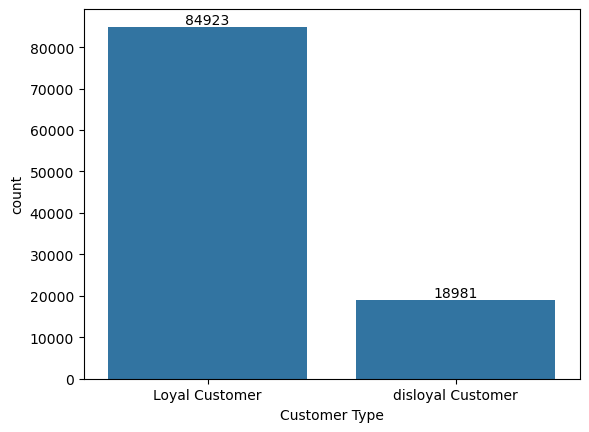

In [546]:
count_plot("Customer Type")

*Most passegenrs are returning (Loyal customer), so they have experienced the service before.*

- Discovering **Type of Travel** column:

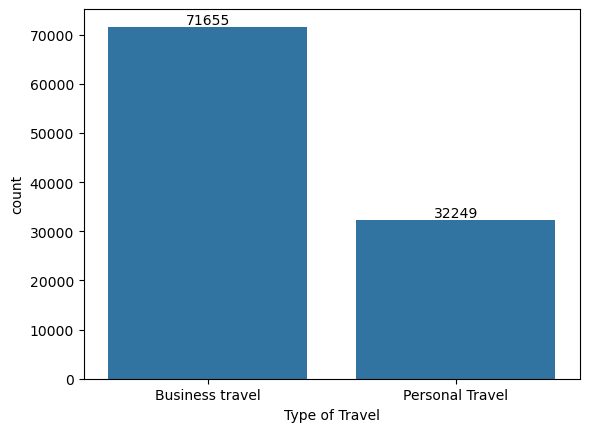

In [550]:
count_plot("Type of Travel")

*Most common type of travel is business.*

- Discovering **Class** column:

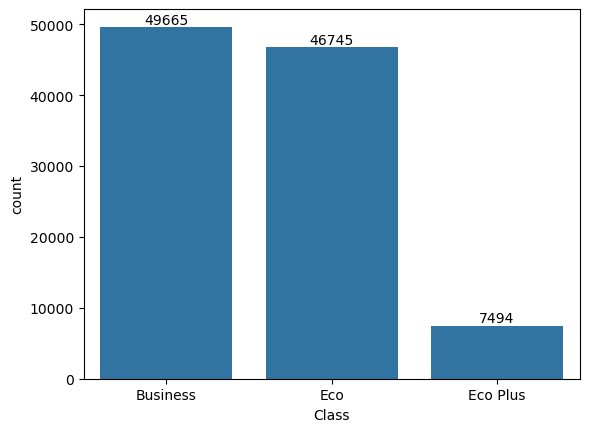

In [554]:
count_plot("Class")

*The most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied.*

### 1.3.2 Encoding

I proceed to transform the values ​​of the column 'satisfaction' into a binary variable:

- the value 'neutral or dissatisfied' is replaced with 0
- the value 'satisfied' is replaced with 1

In [302]:
aereo_train['satisfaction'] = aereo_train['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [303]:
aereo_test['satisfaction'] = aereo_test['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

I proceed by converting the categorical variables (represented as strings or objects) into numeric labels.

In [305]:
# Check the list of categorical variables
aereo_train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [306]:
aereo_test.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [307]:
# This line applies One-Hot Encoding on the columns specified in categorical_columns, creating new binary columns. 
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

aereo_train = pd.get_dummies(aereo_train, columns=categorical_columns, drop_first=True) 
# The drop_first=True argument is used to avoid multicollinearity by dropping the first column for each category.

# Converts all columns in the dataframe to integer type (int).
aereo_train = aereo_train.astype(int)

In [308]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

aereo_test = pd.get_dummies(aereo_test, columns=categorical_columns, drop_first=True)

aereo_test = aereo_test.astype(int)


In [309]:
aereo_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0,1,1,0,0,0,0


In [310]:
aereo_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44,1,0,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0,1,0,0,0,0,0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0,0,1,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6,1,1,0,0,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20,1,0,0,0,1,0


## ⚖️ 1.4 Checking for imbalance

Imbalance checking is checking whether the classes in the dataset are evenly distributed. In a classification problem, if one class is much more represented than another, it could cause performance problems in the model, which tends to favor the more common class.

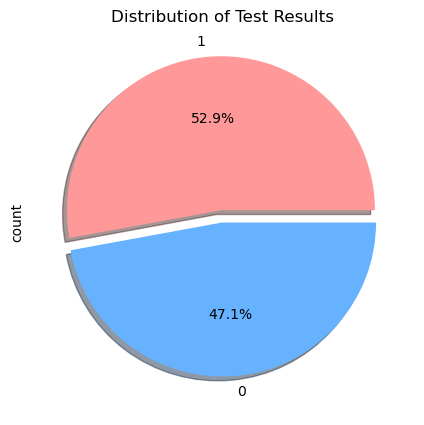

In [457]:
# Checking the nature of data set: balanced or imbalanced?
colors=['#FF9999', '#66B2FF']

aereo_train.satisfaction.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,5), title='Distribution of Test Results', explode=(0.08,0) , shadow=True , colors=colors)
plt.show()

*The above plot shows a distribution between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.*

## ⚠️ 1.5 Outliers (detection and removal)

In [316]:
Q1 = aereo_train.quantile(0.25)
Q3 = aereo_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                    24.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                            1.0
Gender_Male                             1.0
Customer Type_disloyal Customer         0.0
Type of Travel_Personal Travel          1.0
Class_Eco                       

In [317]:
# Removing outliers from dataset
aereo_train = aereo_train[~((aereo_train < (Q1 - 1.5 * IQR)) |(aereo_train > (Q3 + 1.5 * IQR))).any(axis=1)]
aereo_train.shape

(56550, 24)

## 📊 1.6 Correlation matrix

In [319]:
corr = aereo_train.corr()

<Axes: >

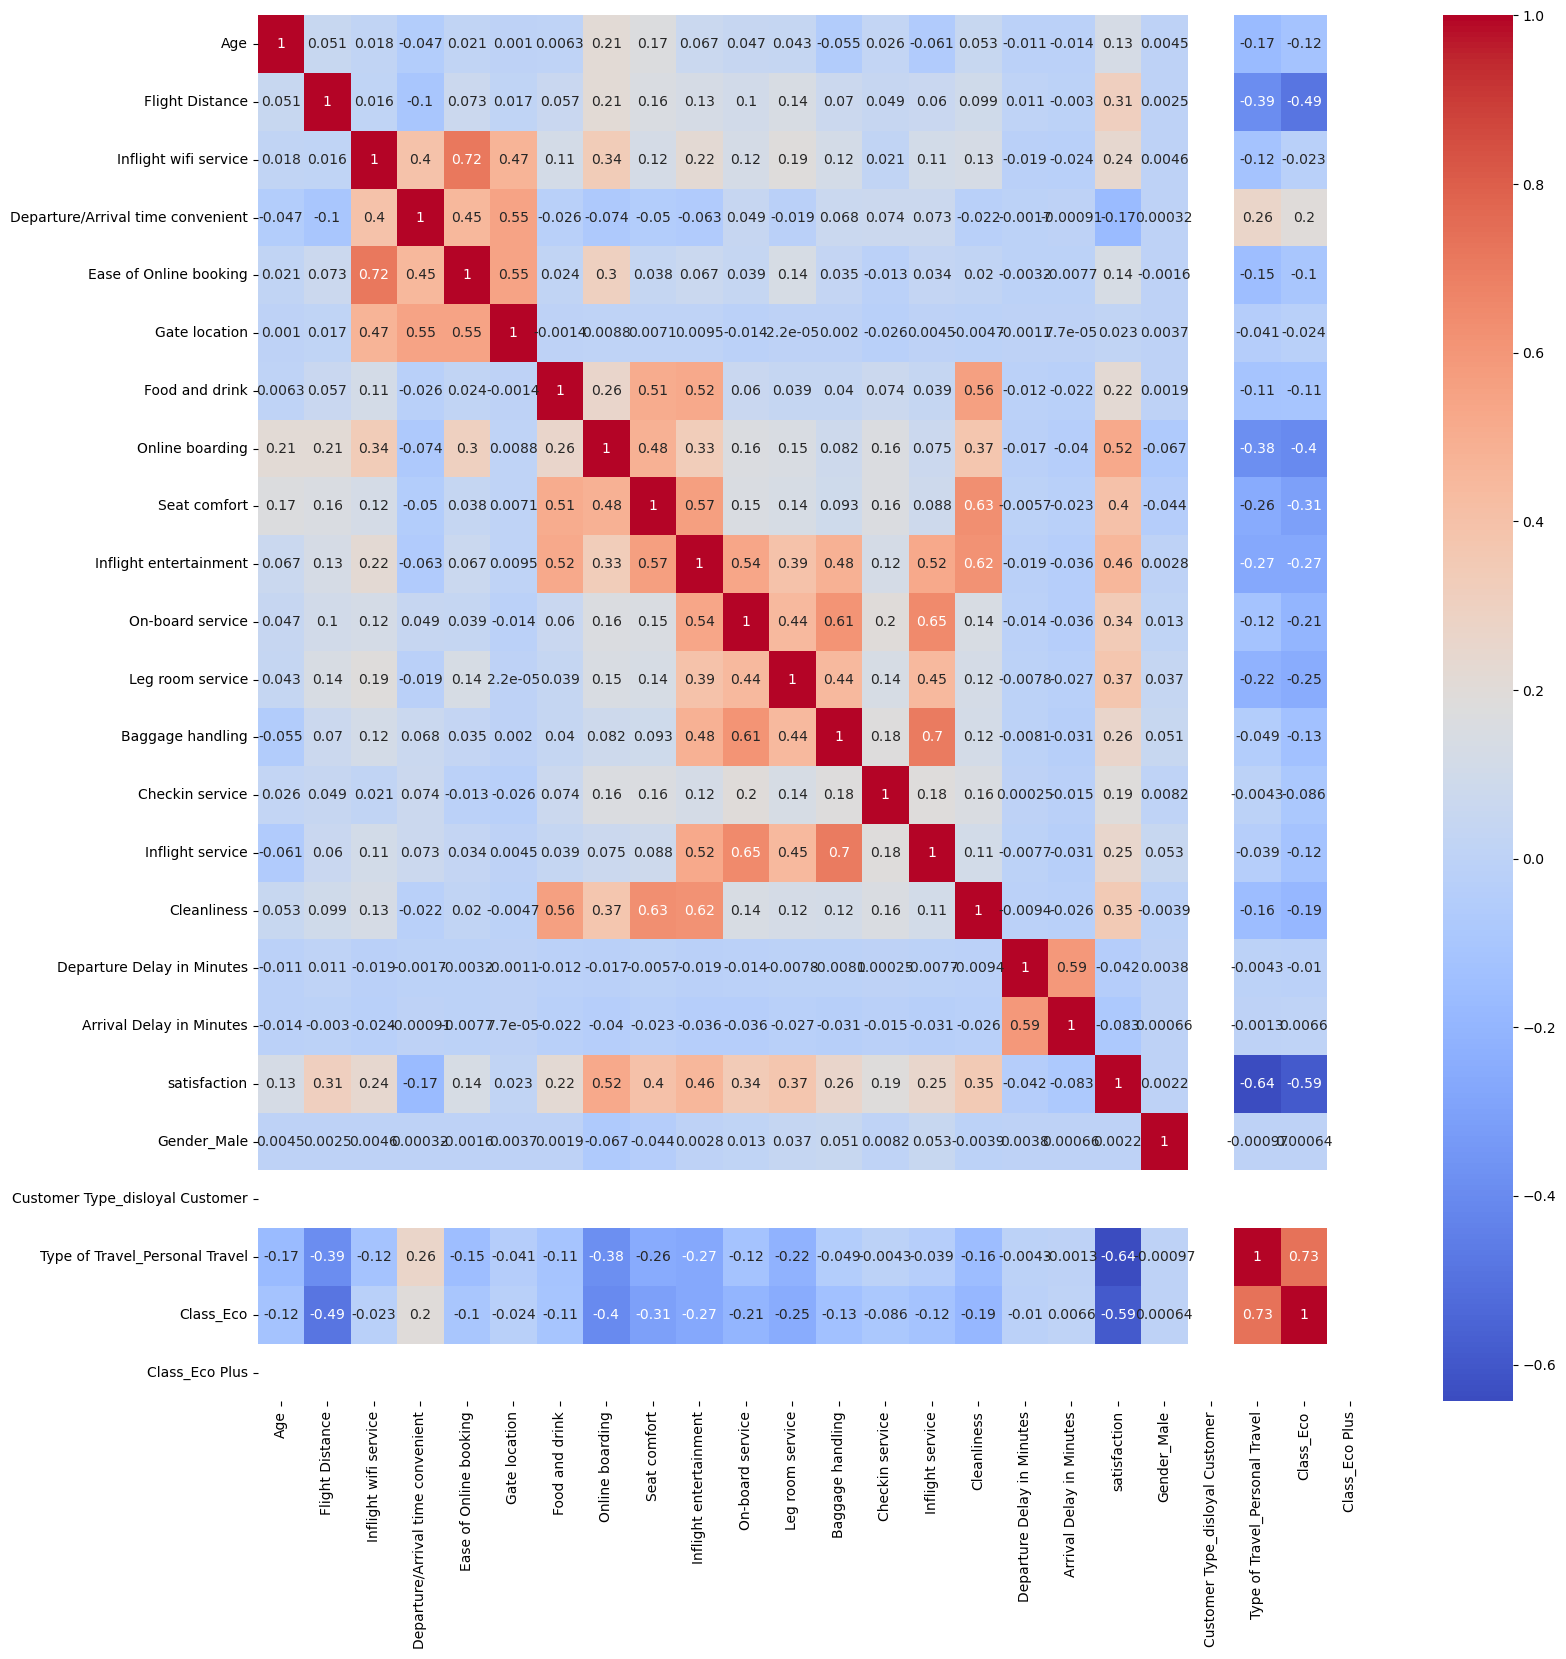

In [320]:
plt.figure(figsize = (18,18))
sns.heatmap(aereo_train.corr(), annot = True, cmap='coolwarm')

*Calculate the correlation of the variables with the target.
I sort the values, so as to see which features are more strongly correlated (positively or negatively) with the target.*

In [322]:
corr["satisfaction"].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.518983
Inflight entertainment               0.460089
Seat comfort                         0.400584
Leg room service                     0.372185
Cleanliness                          0.347255
On-board service                     0.339324
Flight Distance                      0.308229
Baggage handling                     0.259571
Inflight service                     0.254514
Inflight wifi service                0.241486
Food and drink                       0.218234
Checkin service                      0.190541
Ease of Online booking               0.138956
Age                                  0.132473
Gate location                        0.022820
Gender_Male                          0.002181
Departure Delay in Minutes          -0.041911
Arrival Delay in Minutes            -0.082525
Departure/Arrival time convenient   -0.170628
Class_Eco                           -0.586265
Type of Travel_Personal Travel    

The correlation results with the target 'satisfaction' show that the most strongly positively correlated features are:

- Online boarding 
- Inflight entertainment 
- Seat comfort

The negatively correlated features are:

- Type of Travel 
- Class 

None exceeds the correlation coefficient (=1)

Check if there are correlations between variables:

In [325]:
corr.where(np.triu(corr > 0.6, k=1)).stack().sort_values(ascending=False)

Type of Travel_Personal Travel  Class_Eco                 0.732975
Inflight wifi service           Ease of Online booking    0.717175
Baggage handling                Inflight service          0.701285
On-board service                Inflight service          0.652598
Seat comfort                    Cleanliness               0.628596
Inflight entertainment          Cleanliness               0.618697
On-board service                Baggage handling          0.610591
dtype: float64

- There is a strong relationship between Type of Travel and Class with a value of 0.73.
- Inflight wifi service and Ease of Online booking are strongly correlated with a value of 0.71.
- Baggage handling and Inflight service show a correlation of 0.70.
- The correlation between On-board service and Inflight service is 0.65.
- Seat comfort and Cleanliness have a correlation of 0.62.
- Inflight entertainment and Cleanliness have a correlation value of 0.61.
- Finally, On-board service and Baggage handling have a correlation of 0.61.

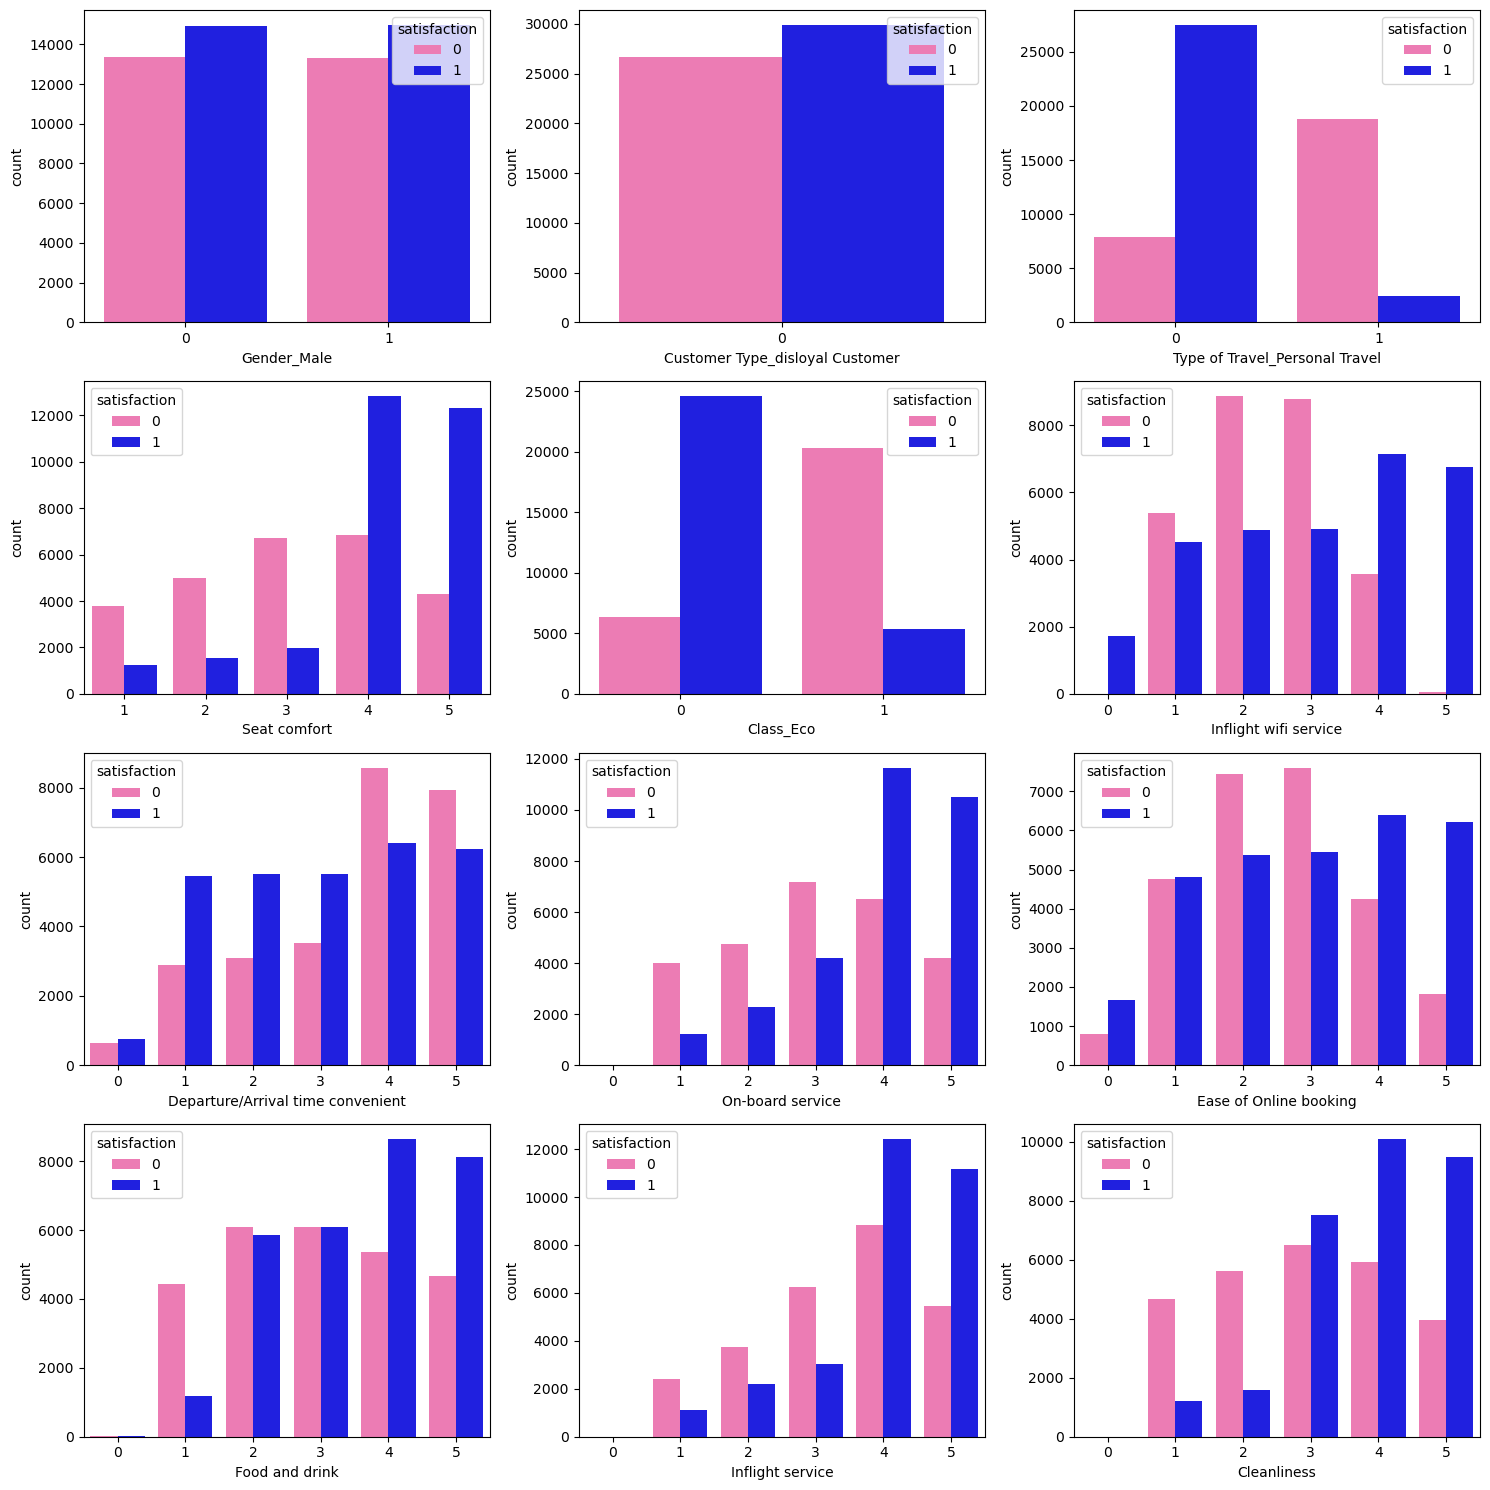

In [327]:
fig, axes = plt.subplots(4, 3, figsize = (15, 15))
palette = ['#FF69B4', '#0000FF']  

sns.countplot(x = 'Gender_Male', data = aereo_train, hue= 'satisfaction', palette= palette, ax = axes[0, 0]);
sns.countplot(x = 'Customer Type_disloyal Customer', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel_Personal Travel', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[1, 0]);
sns.countplot(x = 'Class_Eco', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = aereo_train, hue= 'satisfaction',  palette= palette, ax = axes[3, 2]);

plt.tight_layout()
plt.show()


- People travelling for business are more satisfied as compared to people who are travelling for other purposes.
- Business class people are more satisfied as compared to people travelling in eco class.
- Majority of people who gave 4 or 5 rating in any of the category were generally satisfied with the airline.

## 🎯 1.7 Features selection

### 1.7.1 Chi-square test

In [331]:
X = aereo_train.drop('satisfaction', axis=1)  # Features
y = aereo_train['satisfaction']  # Target

# Calculate chi-square and p-value
chi2_vals, p_vals = chi2(X, y)

chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Statistic': chi2_vals,
    'P_value': p_vals
})

# Order by importance
chi2_df.sort_values(by='Chi2_Statistic', ascending=False, inplace=True)

print(chi2_df)

                              Feature  Chi2_Statistic        P_value
1                     Flight Distance    4.106537e+06   0.000000e+00
20     Type of Travel_Personal Travel    1.465457e+04   0.000000e+00
21                          Class_Eco    1.061606e+04   0.000000e+00
7                     Online boarding    7.493202e+03   0.000000e+00
9              Inflight entertainment    5.753310e+03   0.000000e+00
0                                 Age    5.311683e+03   0.000000e+00
17           Arrival Delay in Minutes    5.021969e+03   0.000000e+00
8                        Seat comfort    3.935804e+03   0.000000e+00
11                   Leg room service    3.793750e+03   0.000000e+00
15                        Cleanliness    3.186276e+03   0.000000e+00
10                   On-board service    2.907380e+03   0.000000e+00
2               Inflight wifi service    2.187956e+03   0.000000e+00
12                   Baggage handling    1.442872e+03   0.000000e+00
6                      Food and dr

High chi-square and low p-values indicate a strong association between the feature and the target variable. Low chi-square and high p-values ​​suggest a weak or no association.

The results of the Chi-square test show that the features with the greatest influence on the target variable include:

- Inflight entertainment
- Flight Distance
- Arrival Delay in Minutes
- Age
- Online boarding

The least influential features include:
- Gate location
- Gender
- Customer Type

### 1.7.2 Mutual information

In [335]:
mutual_info = mutual_info_classif(X, y)

# Create a dataframe
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mutual_info
})

# Order by importance
mutual_info_df.sort_values(by='Mutual_Information', ascending=False, inplace=True)

print(mutual_info_df)

                              Feature  Mutual_Information
20     Type of Travel_Personal Travel            0.230221
7                     Online boarding            0.199558
21                          Class_Eco            0.191910
2               Inflight wifi service            0.128647
9              Inflight entertainment            0.126825
8                        Seat comfort            0.106261
11                   Leg room service            0.086754
15                        Cleanliness            0.071076
1                     Flight Distance            0.068305
10                   On-board service            0.063543
0                                 Age            0.057981
12                   Baggage handling            0.045226
14                   Inflight service            0.041656
6                      Food and drink            0.036189
4              Ease of Online booking            0.033774
13                    Checkin service            0.022918
3   Departure/

The results of Mutual Information show that the most important features are:

- Type of Travel
- Online boarding
- Class
- Inflight wifi service

The least important features include:

- Gate location
- Gender
- Customer Type
- Arrival Delay in Minutes

Features such as Type of Travel, Class, and Online boarding are important in both tests.

Gate location, Gender, and Customer Type are unimportant in both tests.

### 1.7.3 T-test

In [338]:
# Calculate t-test for each feature
t_test_results = []

for column in X.columns:
    group1 = X[y == 0][column]
    group2 = X[y == 1][column]

    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    t_test_results.append((column, t_stat, p_val))

# Create a dataframe
t_test_df = pd.DataFrame(t_test_results, columns=['Feature', 'T_statistic', 'P_value'])

t_test_df.sort_values(by='P_value', ascending=True, inplace=True)

print(t_test_df)


                              Feature  T_statistic        P_value
10                   On-board service   -84.940120   0.000000e+00
15                        Cleanliness   -86.989437   0.000000e+00
14                   Inflight service   -62.063773   0.000000e+00
13                    Checkin service   -46.062645   0.000000e+00
12                   Baggage handling   -63.399826   0.000000e+00
11                   Leg room service   -94.630075   0.000000e+00
20     Type of Travel_Personal Travel   194.626164   0.000000e+00
9              Inflight entertainment  -121.226205   0.000000e+00
21                          Class_Eco   171.051900   0.000000e+00
7                     Online boarding  -143.515256   0.000000e+00
6                      Food and drink   -52.819095   0.000000e+00
3   Departure/Arrival time convenient    41.275736   0.000000e+00
2               Inflight wifi service   -60.725641   0.000000e+00
1                     Flight Distance   -78.339111   0.000000e+00
8         

The T-test results show that the features with the greatest difference between the two groups with respect to the target are:

- Online boarding
- Seat comfort
- Inflight entertainment
- Type of travel
- Class

The least significant features include:

- Gender
- Gate location
- Customer type

### 1.7.4 RESULTS

**Online boarding, Type of Travel, Class e Inflight entertainment**: these features have a significant impact in determining the target variable, with very high absolute T-statistic values ​​and P-values ​​equal to zero, suggesting that the observed differences are statistically highly significant.

**Gender, Gate location, e Customer Type**: these variables have a minor influence on the target and can potentially be ignored or overlooked during the analysis.

----

# 📈 2. EVALUATION METRICS FOR CLASSIFICATION MODELS

Here’s a list of the main evaluation metrics for **classification models**, along with a description of each:

### 1. **Accuracy**
**Accuracy** measures the percentage of correctly classified samples out of the total. It is calculated as the ratio of correct predictions to the total number of observations.

- **Advantages**: Simple to calculate and interpret.
- **Disadvantages**: Can be misleading with imbalanced data, where one class is much more frequent than another.

### 2. **Precision**
**Precision** measures the proportion of positive predictions that are actually correct. It indicates how many of the samples predicted as positive are truly positive.

- **Advantages**: Useful when the cost of false positives is high.
- **Disadvantages**: Does not account for false negatives.

### 3. **Recall (Sensitivity or True Positive Rate)**
**Recall** (or sensitivity) measures the proportion of actual positives that were correctly identified by the model.

- **Advantages**: Useful when it is important to capture all positives, such as in medical diagnostics.
- **Disadvantages**: Does not consider false positives.

### 4. **F1-Score**
The **F1-Score** is the harmonic mean of precision and recall. It is useful when there is a trade-off between precision and recall, and a balance between the two is desired.

- **Advantages**: Provides a balanced measure of performance, especially with imbalanced classes.
- **Disadvantages**: Can be harder to interpret compared to accuracy or individual precision/recall.

### 5. **AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)**
The **AUC-ROC** measures the ability of the model to distinguish between classes. The **ROC curve** plots the trade-off between the **True Positive Rate** (recall) and the **False Positive Rate** across different threshold values. The **AUC** is the area under this curve, where 1 represents perfect classification and 0.5 indicates random classification.

- **Advantages**: Very useful for comparing models, especially when choosing thresholds.
- **Disadvantages**: Not easy to interpret for all types of problems.

### 6. **Confusion Matrix**
A **confusion matrix** is a table that summarizes the performance of a model by showing the counts of **True Positives**, **False Positives**, **True Negatives**, and **False Negatives**.

- **Advantages**: Provides a detailed view of the model’s performance.
- **Disadvantages**: Does not provide a single performance metric, so it can be less intuitive.

### 7. **Logarithmic Loss (Log Loss)**
**Log Loss** measures the performance of a classification model in terms of probability. It evaluates how close the predicted probabilities are to the actual class labels. A lower log loss indicates better performance.

- **Advantages**: Useful for probabilistic models that predict the likelihood of class membership.
- **Disadvantages**: More complex to interpret compared to precision or accuracy.

### 8. **Matthews Correlation Coefficient (MCC)**
The **MCC** is a metric that takes into account all four values of the confusion matrix. It represents the correlation between the predicted and actual values, with 1 indicating perfect classification, 0 indicating random classification, and -1 indicating complete misclassification.

- **Advantages**: Useful for imbalanced datasets and provides a comprehensive evaluation of performance.
- **Disadvantages**: Less well-known compared to other metrics like accuracy or F1-score.

### 9. **Cohen’s Kappa**
**Cohen’s Kappa** evaluates the agreement between the model’s predictions and the true values, adjusted for the probability of random agreement.

- **Advantages**: Takes into account random agreement, making it more informative than simple accuracy.
- **Disadvantages**: Less commonly used and a bit harder to interpret than simpler metrics.

Each metric has its **strengths and weaknesses**, and the choice of which one to use depends on the problem context, the data, and the final objective (e.g., minimizing false positives or false negatives).

----

# 🤖 3. MODEL

I will try two ways: 
1. the first way consists in using all the available features;
2. while the second consists in selecting three, four features that have proven to be more relevant in the T-test above.

For this **binary classification** problem I have chosen three models:
- Random Forest
- AdaBoost
- K-Neighbors.

I will perform a spot check on the chosen models and select the two best models using the k-fold cross validation as an evaluation method.
Then on these two models I will perform a hyperparameter tuning, using RandomizedSearchCV.
- **RandomizedSearchCV** is a hyperparameter optimization technique used to improve the performance of machine learning models. Unlike GridSearchCV, which examines all possible combinations of hyperparameters within a defined range, RandomizedSearchCV chooses a fixed number of random combinations between the specified parameters.

In [345]:
# Split into test and train
# Separate feature (X) and target (y) in the training dataset
X_train = aereo_train.drop(columns='satisfaction')
y_train = aereo_train['satisfaction']

#  Separate feature (X) and target (y) in the test dataset
X_test = aereo_test.drop(columns='satisfaction')
y_test = aereo_test['satisfaction']


In [346]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

## 🛤️ 3.1 WAY ONE (all features)

### 3.1.1 Spot check

I perform a spot check using accuracy as the evaluation metric, for all models: RandomForestClassifier, AdaBoostClassifier, and KNeighborsClassifier. The goal is to perform a quick comparison using 5-fold k-fold cross-validation to evaluate the accuracy of each model and determine which one performs better.

In [350]:
# Define the models to test
models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'K-Neighbors': KNeighborsClassifier()
}

# Set up k-fold cross-validation
seed = 42
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# List to store results
results = {}

# Perform the spot check
for name, model in models.items():
    cv_acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = {
        'Accuracy_mean': np.mean(cv_acc),
        'Accuracy_std': np.std(cv_acc)
    }

# Display the results
for name, res in results.items():
    print(f"{name}: Accuracy_mean={res['Accuracy_mean']:.3f}, Accuracy_std={res['Accuracy_std']:.4f}")


Random Forest: Accuracy_mean=0.968, Accuracy_std=0.0012
AdaBoost: Accuracy_mean=0.927, Accuracy_std=0.0017
K-Neighbors: Accuracy_mean=0.934, Accuracy_std=0.0006


The **accuracy mean** represents the **average** accuracy obtained during the different folds of the **k-fold cross validation**. In k-fold cross validation, the dataset is split into, for example, 5 parts (or folds), and for each fold, the model is trained on 4 parts and tested on the remaining one. This process is repeated 5 times, changing the fold used for testing each time.

Accuracy measures the percentage of correct classifications for each fold. 
This approach is useful because:
- It reduces variance that might arise from training and testing on a single split of the dataset.
- It gives a more reliable estimate of the model's performance on unseen data.

In short, the **accuracy mean** is the average of the percentages of correct classifications achieved during the different tests of cross validation.

Here are the results obtained from the spot check:

- **Random Forest**: Accuracy_mean=0.96, Accuracy_std=0.0010
- **AdaBoost**: Accuracy_mean=0.92, Accuracy_std=0.0017
- **K-Neighbors Classifier**: Accuracy_mean=0.93, Accuracy_std=0.0006

From these values, it can be seen that the **Random Forest** obtained the best average accuracy, followed by the **K-Neighbors Classifier** and the **AdaBoost**. Furthermore, the **Random Forest** also has a very low standard deviation, indicating stable results across folds.

### 3.1.2 Hyperparameter tuning

**Hyperparameter tuning** for **KNN (K-Nearest Neighbors)** and **Random Forest** involves optimizing the model by finding the best combination of hyperparameters that lead to improved performance.

- For **KNN**, key hyperparameters include:
  - `n_neighbors`: Number of neighbors to consider for classification.
  - `weights`: How the distance is weighted (e.g., `uniform` or `distance`).
  - `metric`: The distance metric used, like `euclidean` or `manhattan`.
  - `p`: The power parameter for Minkowski distance, used to generalize distance calculations.

----

- For **Random Forest**, key hyperparameters include:
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of each tree, controlling model complexity.
  - `min_samples_split` and `min_samples_leaf`: Minimum number of samples required to split a node or be a leaf node.
  - `max_features`: Number of features considered when splitting a node.

By using techniques like **RandomizedSearchCV**, these hyperparameters can be fine-tuned through cross-validation to find the combination that yields the best accuracy.

**K-Nearest Neighbors:**

In [355]:
param_grid_kn = {
    'n_neighbors': [3, 5, 7, 9],      # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2]  
}

In [356]:
random_search_kn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                   param_distributions=param_grid_kn,
                                   cv=kfold, 
                                   scoring='accuracy')
random_search_kn.fit(X_train, y_train)

print("Best parameter combination:", random_search_kn.best_params_)
print("Best cross-validation accuracy: %.3f", random_search_kn.best_score_)

Best parameter combination: {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'minkowski'}
Best cross-validation accuracy: 0.9430238726790451


In [357]:
# Prediction on the test set
y_pred_kn1 = random_search_kn.predict(X_test)

# Calculate accuracy
accuracy_kn1 = accuracy_score(y_test, y_pred_kn1)

print("Accuracy on test set: %.3f" % accuracy_kn1)

Accuracy on test set: 0.892


**Random Forest:**

In [359]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [360]:
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=param_grid_rf,
                           cv=kfold,               
                           scoring='accuracy')

random_search_rf.fit(X_train, y_train)

print("Best parameter combination:", random_search_rf.best_params_)
print("Best cross-validation accuracy: %.3f", random_search_rf.best_score_)

Best parameter combination: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best cross-validation accuracy: %.3f 0.9684703801945181


In [361]:
# Prediction on the test set
y_pred_rf1 = random_search_rf.predict(X_test)

# Calculate accuracy
accuracy_rf1 = accuracy_score(y_test, y_pred_rf1)

print("Accuracy on test set: %.3f" % accuracy_rf1)

Accuracy on test set: 0.896


From the results obtained, we can observe that, although **Random Forest** showed a better performance in terms of average accuracy during cross validation (0.96 compared to KNN with 0.93), on the final test set it is the **K-Neighbors Classifier** that has a slightly higher accuracy (0.897 vs. 0.893).

This discrepancy may depend on various factors. **KNN** may fit the test data better than **Random Forest**, which tends to be more influenced by the features and variations present in the training data. However, it is important to consider that the difference in accuracy is minimal and that both models offer solid performance.

## 🛤️ 3.2 WAY TWO (features selection)

I select the features that proved to be most relevant in the T-test:
- Type of travel
- Online boarding
- Inflight entertainment
- Class

In [365]:
features_sel = ['Type of Travel_Personal Travel','Online boarding','Inflight entertainment','Class_Eco Plus']
target_sel = ['satisfaction']

# Split into test and train
X_trainf = aereo_train[features_sel]
y_trainf = aereo_train[target_sel].to_numpy().ravel()
X_testf = aereo_test[features_sel]
y_testf = aereo_test[target_sel].to_numpy().ravel()

### 3.2.1 Spot check

In [367]:
# Define the models to test
models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'K-Neighbors Classifier': KNeighborsClassifier()
}

# Set up k-fold cross-validation
seed = 42
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# List to store results 
results = {}

# Perform the spot check
for name, model in models.items():
    cv_acc = cross_val_score(model, X_trainf, y_trainf, cv=kfold, scoring='accuracy')
    results[name] = {
        'Accuracy_mean': np.mean(cv_acc),
        'Accuracy_std': np.std(cv_acc)
    }

# Display the results
for name, res in results.items():
    print(f"{name}: Accuracy_mean={res['Accuracy_mean']:.3f}, Accuracy_std={res['Accuracy_std']:.4f}")


Random Forest: Accuracy_mean=0.895, Accuracy_std=0.0010
AdaBoost: Accuracy_mean=0.883, Accuracy_std=0.0011
K-Neighbors Classifier: Accuracy_mean=0.871, Accuracy_std=0.0106


Here are the results obtained from the spot check:

- **Random Forest**: Accuracy_mean=0.8965, Accuracy_std=0.0027
- **AdaBoost**: Accuracy_mean=0.8776, Accuracy_std=0.0022
- **K-Neighbors Classifier**: Accuracy_mean=0.8734, Accuracy_std=0.0086

In this case, Random Forest obtained the best average accuracy, followed by AdaBoost and finally K-Neighbors Classifier. Again, Random Forest shows good stability with a relatively low standard deviation, while K-Neighbors Classifier has the highest standard deviation, indicating more variability between the various folds.

### 3.2.2 Hyperparameter tuning

**AdaBoost:**

In [371]:
model = AdaBoostClassifier(algorithm='SAMME')

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],    # Indicates the number of base trees that AdaBoost trains.
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],  # Defines how much each tree influences the construction of the final model.
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)

# Esegui l'addestramento
random_search.fit(X_trainf, y_trainf)

# Print best results
print("Best parameters:", random_search.best_params_)
print("Accuracy with cross-validation: %.3f", random_search.best_score_)


Best parameters: {'n_estimators': 50, 'learning_rate': 0.5}
Accuracy with cross-validation: %.3f 0.8839257294429708


In [372]:
# Test the model on the test set
y_pred_adb = random_search.predict(X_testf)

# Calculate accuracy
accuracy_adb = accuracy_score(y_testf, y_pred_adb)

print("Accuracy on test set: %.3f" % accuracy_adb)

Accuracy on test set: 0.823


**Random Forest:**

In [374]:
# RF WITH RANDOMIZEDSEARCHCV AND SELECTED FEATURES

random_search_rf.fit(X_trainf, y_trainf)

print("Best parameter combination:", random_search_rf.best_params_)
print("Best cross-validation accuracy: %.3f", random_search_rf.best_score_)

Best parameter combination: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
Best cross-validation accuracy: %.3f 0.8946419098143235


In [375]:
# Prediction on the test set
y_pred_rf2 = random_search_rf.predict(X_testf)

# Calculate accuracy
accuracy_rf2 = accuracy_score(y_testf, y_pred_rf2)

print("Accuracy on test set: %.3f" % accuracy_rf2)

Accuracy on test set: 0.826


----

# 📝 4. CONCLUSIONS

In [377]:
# Create a dictionary with the results
results_baseline_model = {
    'MODEL': ['RandomForest', 'AdaBoost', 'KNeghbors'],
    'Accuracy': [0.968,0.927,0.934]
}

results_way1 = {
    'WAY ONE': ['KNeighbors', 'RandomForest'],
    'Accuracy': [accuracy_kn1, accuracy_rf1]
}

results_way2 = {
    'WAY TWO': ['RandomForest', 'AdaBoost'],
    'Accuracy': [accuracy_rf2, accuracy_adb]
}

# Create a dataframe pandas
df0 = pd.DataFrame(results_baseline_model)
df1 = pd.DataFrame(results_way1)
df2 = pd.DataFrame(results_way2)

# Show 
print(df0)
print(df1)
print(df2)

          MODEL  Accuracy
0  RandomForest     0.968
1      AdaBoost     0.927
2     KNeghbors     0.934
        WAY ONE  Accuracy
0    KNeighbors  0.892478
1  RandomForest  0.895557
        WAY TWO  Accuracy
0  RandomForest  0.826070
1      AdaBoost  0.822759


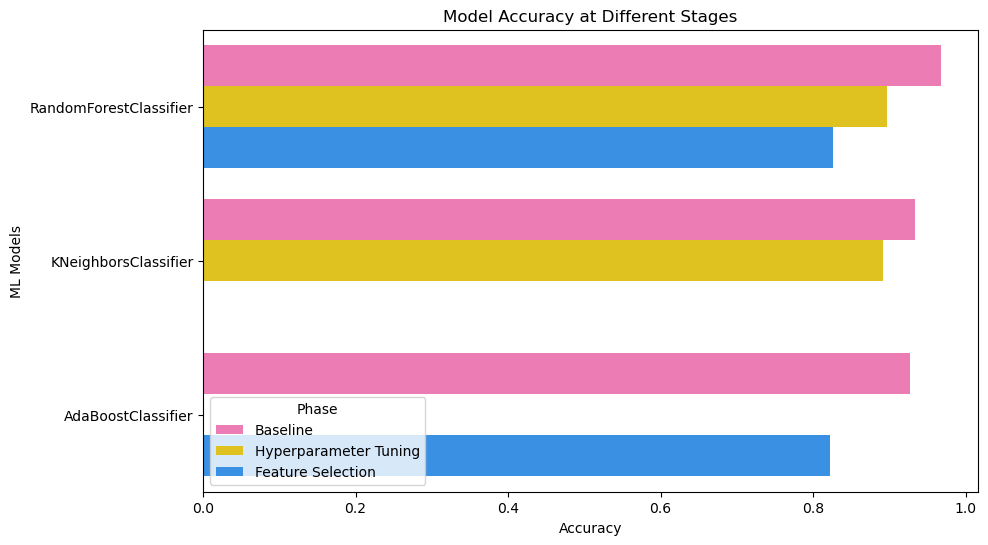

In [459]:
# Create a dataframe with the results
cv_results = pd.DataFrame({
    "Accuracy": [0.968, 0.934, 0.927,  # Baseline
                 0.897, 0.891, 0,  # After Hyperparameter Tuning
                 0.826, 0, 0.822], # After Feature Selection
    "ML Models": ["RandomForestClassifier", "KNeighborsClassifier", "AdaBoostClassifier"] * 3,
    "Phase": ["Baseline"] * 3 + ["Hyperparameter Tuning"] * 3 + ["Feature Selection"] * 3
})

# Define a custom color palette
custom_colors = ['#FF69B4', '#FFD700', '#1E90FF']

plt.figure(figsize=(10, 6))
g = sns.barplot(x="Accuracy", y="ML Models", hue="Phase", data=cv_results, palette=custom_colors)

g.set_xlabel("Accuracy")
g.set_title("Model Accuracy at Different Stages")


plt.legend(title="Phase")
plt.show()


*This graph is useful for comparing not only the performance between different models but also for observing the impact of the various phases on improving or worsening the accuracy.*

----

Analyzing the performance of the models across the different stages of the machine learning process revealed valuable insights into the behavior of each algorithm.

In the **baseline stage**, the **Random Forest** model achieved an accuracy on the training set of **96.8%**, outperforming other models such as **KNeighbors** at **93.4%** and **AdaBoost** at **92.7%**. This indicates that Random Forest is particularly effective for the dataset used, likely due to its robust ability to handle complexity and capture interactions between variables.

In the **Way one** with all features, hyperparameter tuning was applied, both **KNeighbors** and **Random Forest** showed excellent accuracy scores on the test set. Random Forest achieved around **89.79%** and KNeighbors around **89.16%**. These results suggest that hyperparameter tuning positively impacted model performance, improving the algorithms’ predictive capabilities.

However, in **Way Two** with feature selection, the results were less favorable, with **Random Forest** achieving an accuracy of **82.61%** and **AdaBoost** achieving **82.28%**. This performance decline implies that the feature reduction process may have removed critical information that the models relied on to make accurate predictions. The decline in accuracy highlights the importance of carefully selecting features, as poor decisions at this stage can significantly impact the effectiveness of the models.

In summary, while hyperparameter tuning led to significant performance improvements, the feature selection stage had a negative effect on model accuracy. It highlights the need to strategically consider which features to keep in the model, as removing them can impact predictive capabilities.

So, from the data obtained we can say that the best performing model is the Random Forest through the validation of the hyperparameters